In [1]:
import xdem
import geoutils as gu
import pyproj
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dem = xdem.DEM("data/copernicus/copernicus_dsm_4326.tif")
print(dem.get_terrain_attribute)            # коротка інформація
print(dem.info)     # детальна інформація про розмір, CRS, NoData, статистику


<bound method DEM.get_terrain_attribute of DEM(
  data=not_loaded; shape on disk (1, 10801, 14401); will load (10801, 14401)
  transform=| 0.00, 0.00, 23.00|
            | 0.00,-0.00, 50.00|
            | 0.00, 0.00, 1.00|
  crs=EPSG:4326
  nodata=-9999.0)>
<bound method Raster.info of DEM(
  data=not_loaded; shape on disk (1, 10801, 14401); will load (10801, 14401)
  transform=| 0.00, 0.00, 23.00|
            | 0.00,-0.00, 50.00|
            | 0.00, 0.00, 1.00|
  crs=EPSG:4326
  nodata=-9999.0)>


In [3]:
pyproj.CRS(dem.crs)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
dem.set_vcrs("EGM08")

In [5]:
from pyproj import CRS

print(dem.vcrs)              # текстове або об'єктне представлення
print(type(dem.vcrs))        # має бути <class 'pyproj.crs.vertical.VerticalCRS'>
print(isinstance(dem.vcrs, CRS))  

EPSG:3855
<class 'pyproj.crs.crs.CRS'>
True


In [6]:
print(dem.vcrs.to_wkt())  # WKT опис CRS


VERTCRS["EGM2008 height",VDATUM["EGM2008 geoid"],CS[vertical,1],AXIS["gravity-related height (H)",up,LENGTHUNIT["metre",1]],USAGE[SCOPE["Geodesy."],AREA["World."],BBOX[-90,-180,90,180]],ID["EPSG",3855]]


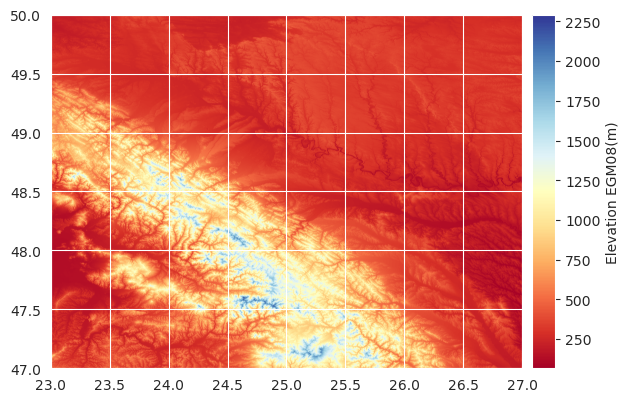

In [8]:
dem.plot(cmap="RdYlBu",  cbar_title="Elevation EGM08(m)")


In [10]:
print("Original DEM (EGM08):", np.unique(dem.data))


Original DEM (EGM08): [65.55419158935547 65.75545501708984 66.3632583618164 ... 2291.27734375
 2291.685302734375 2292.826171875]


In [7]:
dem_ellip = dem.to_vcrs("Ellipsoid")
print(dem_ellip.vcrs)
print("Ellipsoid DEM:", np.unique(dem_ellip.data))



Ellipsoid
Ellipsoid DEM: [98.90455627441406 99.10069274902344 99.7188491821289 ... 2330.58203125
 2330.991455078125 2332.132568359375]


In [8]:
dem_ellip.save("/mnt/c/Users/5302/PycharmProjects/geoid/data/copernicus/copernicus_dеm_ellip.tif")


In [9]:
mask_path = "/mnt/c/Users/5302/PycharmProjects/geoid/data/basin_bil_cher_buf_500.gpkg"  # твоя буферна маска


In [14]:
import os
print(os.path.exists("/mnt/c/Users/5302/PycharmProjects/geoid/data/copernicus/copernicus_dem_ellip.tif"))


False


In [18]:
with open("/mnt/c/Users/5302/PycharmProjects/geoid/data/copernicus/copernicus_dem_ellip.tif", "rb") as f:
    print("✅ Файл читається")


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/5302/PycharmProjects/geoid/data/copernicus/copernicus_dem_ellip.tif'

In [17]:
import os
print("Твій робочий каталог:", os.getcwd())


Твій робочий каталог: /mnt/c/Users/5302/PycharmProjects/geoid


In [16]:
import platform
from pathlib import Path

if platform.system() == "Windows":
    dem_path = Path(r"C:\Users\5302\PycharmProjects\geoid\data\copernicus\copernicus_dem_ellip.tif")
else:
    dem_path = Path("/mnt/c/Users/5302/PycharmProjects/geoid/data/copernicus/copernicus_dem_ellip.tif")

print(dem_path.exists())


False


In [15]:
from pathlib import Path

dem_path = Path("/mnt/c/Users/5302/PycharmProjects/geoid/data/copernicus/copernicus_dem_ellip.tif")
print(dem_path.exists())  # має бути True


False


In [10]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from pathlib import Path

# --- Вхідні дані ---
dem_path = Path("/mnt/c/Users/5302/PycharmProjects/geoid/data/copernicus/copernicus_dem_ellip.tif")  # твій DEM
mask_path = Path("/mnt/c/Users/5302/PycharmProjects/geoid/data/basin_bil_cher_buf_500.gpkg")         # твоя маска
output_path = dem_path.parent / f"{dem_path.stem}_clipped.tif"                                       # куди зберегти результат

# --- Читання маски ---
gdf = gpd.read_file(mask_path)
geometry = gdf.geometry.values

# --- Обрізка DEM ---
with rasterio.open(dem_path) as src:
    clipped_image, clipped_transform = mask(src, shapes=geometry, crop=True)
    out_meta = src.meta.copy()
    out_meta.update({
        "height": clipped_image.shape[1],
        "width": clipped_image.shape[2],
        "transform": clipped_transform
    })

    # --- Збереження обрізаного DEM ---
    with rasterio.open(output_path, "w", **out_meta) as dest:
        dest.write(clipped_image)

print(f"✅ DEM обрізано та збережено до: {output_path}")


RasterioIOError: /mnt/c/Users/5302/PycharmProjects/geoid/data/copernicus/copernicus_dem_ellip.tif: No such file or directory

In [9]:
import pyproj
print(pyproj.datadir.get_data_dir())  # має вивести той самий шлях


/home/niko/miniforge3/envs/geoid/share/proj


In [22]:
from pyproj.datadir import get_data_dir
print(get_data_dir())



/home/niko/miniforge3/envs/geoid/share/proj


In [19]:
trans_dem = dem_ellip.to_vcrs("/mnt/c/Users/5302/PycharmProjects/geoid/data/egg_2015.tif")


In [20]:
trans_dem.save("/mnt/c/Users/5302/PycharmProjects/geoid/data/copernicus/copernicus_dеm_egg2015.tif")


In [18]:
import numpy as np
z_geoid = np.array(dem.data, copy=True)
z_egg = np.array(trans_dem.data, copy=True)

mask = (z_geoid == -9999) | (z_egg == -9999)
delta = np.where(mask, np.nan, z_egg - z_geoid)

print(f"Середня різниця (EGG2015 - EGM08): {np.nanmean(delta):.2f} м")



Середня різниця (EGG2015 - EGM08): 0.24 м


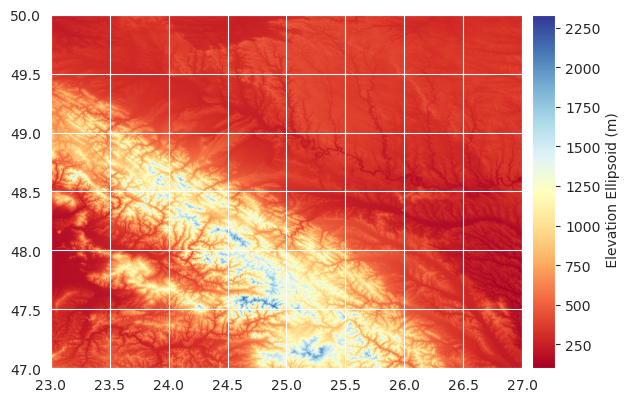

In [13]:
dem_ellip.plot(cmap="RdYlBu",  cbar_title=" Elevation Ellipsoid (m)")


In [17]:
from pathlib import Path
import pyproj

proj_path = Path(pyproj.datadir.get_data_dir())
print(list(proj_path.glob("egg_2015*.gtx")))


[PosixPath('/home/niko/miniforge3/envs/geoid/share/proj/egg_2015.gtx')]


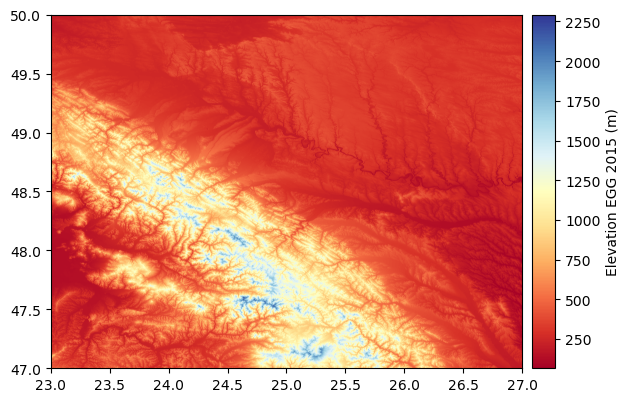

In [16]:
trans_dem.plot(cmap="RdYlBu",  cbar_title="Elevation EGG 2015 (m)")

In [17]:
# import xdem
# import geoutils as gu
#
# dem = xdem.DEM("data/Copernicus_DSM/copernicus_dsm_4326.tif")        # або твій об’єднаний DEM
# dem.set_vcrs("EGM08")                             # встановлюємо геоїдну систему
#
# dem_ellip = dem.to_vcrs("Ellipsoid")              # конвертація до еліпсоїда
# trans_dem = dem_ellip.to_vcrs("egg_2015.gtx")     # перехід до EGG2015


In [18]:
geoid_egm08 = dem_ellip - dem          # Ellipsoid - EGM08
geoid_egg2015 = dem_ellip - trans_dem  # Ellipsoid - EGG2015

# Обчислюємо різницю між двома геоїдами:
diff_models = geoid_egm08 - geoid_egg2015


In [19]:
diff_models = trans_dem - dem

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Обробка nodata
diff_data = diff_models.data.filled(np.nan)  # без копії всієї матриці в RAM
diff_data[diff_data == -9999] = np.nan  # якщо є

plt.figure(figsize=(8, 6))
plt.imshow(diff_data, cmap="coolwarm", vmin=-0.3, vmax=0.3)
plt.colorbar(label="Геоїдна різниця (EGM08 – EGG2015) [m]")
plt.title("Різниця між геоїдними моделями")
plt.axis("off")
plt.tight_layout()
plt.show()


In [1]:
dem_ellipsoid= dem_ellip
dem_geoid = dem
dem_egg2015 =trans_dem

NameError: name 'dem_ellip' is not defined

In [5]:

dem_metric = dem_egg2015.reproject(crs="EPSG:3035")


In [7]:
dem_geoid_3035 = dem_geoid.reproject(crs="EPSG:3035")

In [6]:
pyproj.CRS(dem_metric.crs)

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- [north]: Northing (metre)
- [east]: Easting (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Azimuthal Equal Area
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
# 1. Підготовка DEM у метричній CRS (наприклад EPSG:3035)
dem_egg2015_m = dem_metric
dem_egm08_m   = dem_geoid_3035 
dem_ellip_m   = dem_ellipsoid.reproject(crs="EPSG:3035")

In [10]:
pyproj.CRS(dem_geoid_3035.crs)

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- [north]: Northing (metre)
- [east]: Easting (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Azimuthal Equal Area
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xdem
from xdem.spatialstats import nd_binning, nmad, plot_1d_binning

 # ваш DEM у Ellipsoid → метрична

# 2. Обчислення похибок (elevation difference) відносно EGG2015
err_egm = dem_egm08_m.data - dem_egg2015_m.data
err_ell = dem_ellip_m.data - dem_egg2015_m.data

# 3. Розрахунок ухилу для бінінгу
slope = xdem.terrain.slope(dem_egg2015_m)  # взяли EGG2015 як опорний
slope_arr = slope.data

# 4. Фільтрація валідних пікселів
mask = (~np.isnan(slope_arr)) & (~np.isnan(err_egm)) & (~np.isnan(err_ell))

slope_arr = slope_arr[mask]
err_egm    = err_egm[mask]
err_ell    = err_ell[mask]

# 5. 1D-бінінг похибки за ухилом
bins = 30
df_egm = nd_binning(
    values=err_egm,
    list_var=[slope_arr],
    list_var_names=["slope"],
    statistics=["count", np.nanmedian, nmad],
    list_var_bins=bins
)
df_ell = nd_binning(
    values=err_ell,
    list_var=[slope_arr],
    list_var_names=["slope"],
    statistics=["count", np.nanmedian, nmad],
    list_var_bins=bins
)

# 6. Візуалізація: дві криві NMAD(Δh) vs slope
plt.figure(figsize=(8,4))
plt.plot(df_egm["slope"].apply(lambda i: i.mid), df_egm["nmad"],
         marker="o", label="EGM08 – EGG2015")
plt.plot(df_ell["slope"].apply(lambda i: i.mid), df_ell["nmad"],
         marker="s", label="Ellipsoid – EGG2015")
plt.xlabel("Ухил (°)")
plt.ylabel("NMAD(Δh), м")
plt.title("Залежність похибки висоти від ухилу")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Гістограми розподілу похибок
plt.figure(figsize=(8,4))
bins = np.linspace(-1,1,100)  # підберіть інтервал відповідно до вашого діапазону помилок
plt.hist(err_egm.flatten(), bins=bins, alpha=0.6, label="EGM08 – EGG2015")
plt.hist(err_ell.flatten(), bins=bins, alpha=0.6, label="Ellipsoid – EGG2015")
plt.xlabel("Δh, м")
plt.ylabel("Кількість пікселів")
plt.title("Гістограма похибок висоти")
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
from datetime import datetime

demcollection = xdem.DEMCollection(
    dems=[dem_ellipsoid, dem_geoid, dem_egg2015],
    timestamps=[
        datetime(2000, 1, 1),  # просто мітка, щоб відрізнити DEM
        datetime(2001, 1, 1),
        datetime(2002, 1, 1)
    ],
    reference_dem=2  # EGG2015 — як базовий DEM
)


In [8]:
_ = demcollection.subtract_dems()

# Тепер у demcollection.ddems є різниці відносно dem_egg2015
ddem_ellip = demcollection.ddems[0]  # ellipsoid - egg2015
ddem_geoid = demcollection.ddems[1]  # egm08 - egg2015


In [10]:
import numpy as np
from xdem.spatialstats import nmad

for name, ddem in demcollection.ddems[:2]:
    
    array = ddem.data.squeeze()
    array = array[np.isfinite(array)]
    print(f"{name}:")
    print(f"  ME    = {np.mean(array):.2f} m")
    print(f"  MedE  = {np.median(array):.2f} m")
    print(f"  RMSE  = {np.sqrt(np.mean(array**2)):.2f} m")
    print(f"  NMAD  = {nmad(array):.2f} m")
    print(f"  STD   = {np.std(array):.2f} m\n")


ValueError: too many values to unpack (expected 2)

In [16]:

# Припустимо, що у тебе вже є:
# dem_ellipsoid - DEM з висотами по еліпсоїду
# dem_egm08     - DEM з висотами по EGM08
# dem_egg2015   - DEM з висотами по EGG2015 (референсний)

# Різниця між еліпсоїдними висотами та EGG2015
diff_ellip_egg = dem_ellipsoid.data - dem_egg2015.data

# Різниця між EGM08 і EGG2015
diff_egm_egg = dem_geoid.data - dem_egg2015.data

# Різниця між еліпсоїдними висотами та EGG2015
diff_ellip_egg = dem_ellipsoid.data - dem_egg2015.data





In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Побудова діаграми boxplot
sns.boxplot(data=[
    diff_egm_egg.flatten()
])
plt.xticks([0], ['EGM08 - EGG2015'])
plt.ylabel('Δh (m)')
plt.title('Розподіл різниць висот DEM у різних VCRS')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
sns.boxplot(data=[
    diff_egm_egg.flatten()
])
plt.xticks([0], ['EGM08 - EGG2015'])
plt.ylabel('Δh (m)')
plt.title('Розподіл різниць висот Copernicus DSM у різних VCRS')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import xdem
import rasterio
import matplotlib.pyplot as plt

# Завантаження DEM з квазігеоїдною висотою (наприклад, EGG2015)


# Обчислимо потенціальну енергію на піксель для шару води товщиною 1 м:
# E_p = ρ * g * h, де ρ = 1000 кг/м³ (щільність води)
rho = 1000  # кг/м³
g = 9.81  # м/с²
h = dem_egg2015.data

# Потенціальна енергія в кожному пікселі (на одиницю об'єму води)
Ep = rho * g * h  # у Дж/м³

# Візуалізація
plt.imshow(Ep.squeeze(), cmap="viridis")
plt.title("Гравітаційна потенціальна енергія води (J/m³)")
plt.colorbar(label="Енергія")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import xdem
import rasterio
import matplotlib.pyplot as plt

# Завантаження DEM з квазігеоїдною висотою (наприклад, EGG2015)

# Обчислимо потенціальну енергію на піксель для шару води товщиною 1 м:
# E_p = ρ * g * h, де ρ = 1000 кг/м³ (щільність води)
rho = 1000  # кг/м³
g = 9.81  # м/с²
h = dem_geoid.data

# Потенціальна енергія в кожному пікселі (на одиницю об'єму води)
Ep = rho * g * h  # у Дж/м³

# Візуалізація
plt.imshow(Ep.squeeze(), cmap="viridis")
plt.title("Гравітаційна потенціальна енергія води (J/m³)")
plt.colorbar(label="Енергія")
plt.tight_layout()
plt.show()


In [1]:
import numpy as np

def compute_gravitational_potential_energy(dem_array, density=1000, g=9.81):
    """
    Обчислює гравітаційну потенціальну енергію води для заданого DEM.

    Parameters
    ----------
    dem_array : np.ndarray або xdem.DEM
        Массив або DEM з висотами в метрах.
    density : float, optional
        Густина води (за замовчуванням 1000 кг/м³).
    g : float, optional
        Прискорення вільного падіння (за замовчуванням 9.81 м/с²).

    Returns
    -------
    np.ndarray
        Масив з енергією в Дж/м³ (J/m³).
    """
    if hasattr(dem_array, "data"):  # якщо це xdem.DEM
        heights = dem_array.data
    else:
        heights = dem_array  # numpy array

    return density * g * heights


In [2]:
# Припустимо, у тебе вже є:
# dem_ellipsoid, dem_egm, dem_egg2015 — всі xdem.DEM

energy_ellip = compute_gravitational_potential_energy(dem_ellipsoid)
energy_egm = compute_gravitational_potential_energy(dem_geoid)
energy_egg = compute_gravitational_potential_energy(dem_egg2015)

# Потім можна побудувати різниці енергії
diff_energy_ellip_egg = energy_ellip - energy_egg
diff_energy_egm_egg = energy_egm - energy_egg


NameError: name 'dem_ellipsoid' is not defined

In [ ]:

# Візуалізація
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

im1 = ax[0].imshow(diff_energy_ellip_egg, cmap='RdBu', vmin=-2e6, vmax=2e6)
ax[0].set_title("Еліпсоїд - EGG2015")
fig.colorbar(im1, ax=ax[0], label='ΔE (J/m³)')

im2 = ax[1].imshow(diff_energy_egm_egg, cmap='RdBu', vmin=-2600, vmax=0)
ax[1].set_title("EGM08 - EGG2015")
fig.colorbar(im2, ax=ax[1], label='ΔE (J/m³)')

plt.suptitle("Різниця гравітаційної потенціальної енергії води")
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns

sns.boxplot(data=[
    diff_energy_egm_egg.flatten()
])
plt.xticks([0], [ 'EGM08 - EGG2015'])
plt.ylabel('ΔE (J/m³)')
plt.title('Розподіл різниць гравітаційної потенціальної енергії')
plt.show()


In [36]:
from xdem.spatialstats import nmad
import numpy as np

def stats(arr):
    return {
        "ME": np.mean(arr),
        "MedE": np.median(arr),
        "RMSE": np.sqrt(np.mean(arr**2)),
        "NMAD": nmad(arr),
        "STD": np.std(arr)
    }

print(stats(diff_energy_ellip_egg))
print(stats(diff_energy_egm_egg))


NameError: name 'diff_energy_ellip_egg' is not defined

In [37]:
import xdem
from xdem.spatialstats import nd_binning, nmad, plot_2d_binning


In [38]:
# Крок 1: Обчислення рельєфних характеристик
slope, curvature = xdem.terrain.get_terrain_attribute(dem_geoid, attribute=["slope", "maximum_curvature"])

# Крок 2: Отримуємо масиви значень (NumPy)
dh_arr = diff_energy_egm_egg.data
slope_arr = slope.data
curv_arr = curvature.data

# Крок 3: Маскування NaN значень при потребі (опційно)
slope_arr = np.where(np.isnan(slope_arr), np.nan, slope_arr)
curv_arr = np.where(np.isnan(curv_arr), np.nan, curv_arr)

# Крок 4: Двовимірне бінування для оцінки залежності похибки від рельєфу
df = nd_binning(
    values=dh_arr,
    list_var=[slope_arr, curv_arr],
    list_var_names=["slope", "curvature"],
    statistics=["count", np.nanmedian, nmad],
    list_var_bins=30,
)


NameError: name 'dem_geoid' is not defined

In [39]:
plot_2d_binning(
    df,
    var_name_1="slope",
    var_name_2="curvature",
    statistic_name="nmad",
    label_var_name_1="Схил (градуси)",
    label_var_name_2="Макс. кривина (1/100 м)",
    label_statistic="NMAD похибки ΔE (J/м³)",
)


NameError: name 'df' is not defined

In [40]:
# Припустимо, у тебе вже є:
# dem_ellipsoid, dem_egm, dem_egg2015 — всі xdem.DEM

energy_ellip = compute_gravitational_potential_energy(dem_ellipsoid)
energy_egm = compute_gravitational_potential_energy(dem_geoid)
energy_egg = compute_gravitational_potential_energy(dem_egg2015)


NameError: name 'compute_gravitational_potential_energy' is not defined

In [41]:

delta_energy = energy_egm - energy_egg


NameError: name 'energy_egm' is not defined

In [43]:
print(dem_metric.crs)

# Тепер можна рахувати ухил
slope = xdem.terrain.slope(dem_metric)

NameError: name 'dem_metric' is not defined

In [44]:
slope_arr = slope.data
valid_slope = slope_arr[(slope_arr >= 0) & (slope_arr < 90)]

plt.figure(figsize=(8, 5))
plt.hist(valid_slope, bins=30, color='cornflowerblue', edgecolor='black')
plt.title("Гістограма ухилів рельєфу (xDEM + метрична проекція)")
plt.xlabel("Схил (градуси)")
plt.ylabel("Кількість пікселів")
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'slope' is not defined

In [45]:
slope_arr = slope.data

plt.figure(figsize=(7, 6))
plt.imshow(slope_arr, cmap="terrain", vmin=0, vmax=60)  # vmax залежить від рельєфу
plt.colorbar(label="Схил (градуси)")
plt.title("Карта ухилів рельєфу (EGG2015)")
plt.axis('off')
plt.tight_layout()
plt.show()

NameError: name 'slope' is not defined

In [47]:
import numpy as np
import xdem
from xdem.spatialstats import nd_binning, nmad, plot_2d_binning
import matplotlib.pyplot as plt

   # DEM з EGG2015

# 3. Різниця енергії
dh_arr = (energy_egm - energy_egg).data

# 4. Обчислення ухилу та кривини на основі EGM08 DEM
slope, curvature = xdem.terrain.get_terrain_attribute(dem_egm_projattribute=["slope", "maximum_curvature"])
slope_arr = slope.data
curv_arr = curvature.data

# 5. Фільтрація валідних пікселів
mask = ~np.isnan(slope_arr) & ~np.isnan(curv_arr) & ~np.isnan(dh_arr)

# 6. Бінінг похибки
df = nd_binning(
    values=dh_arr[mask],
    list_var=[slope_arr[mask], curv_arr[mask]],
    list_var_names=["slope", "curvature"],
    statistics=["count", np.nanmedian, nmad],
    list_var_bins=30,
)

# 7. Побудова графіка
plot_2d_binning(
    df,
    var_name_1="slope",
    var_name_2="curvature",
    statistic_name="nmad",
    label_var_name_1="Схил (градуси)",
    label_var_name_2="Макс. кривина (1/100 м)",
    label_statistic="NMAD ΔE (J/м³)",
)
plt.title("Залежність NMAD похибки енергії від схилу та кривини (EGM08 vs EGG2015)")
plt.tight_layout()
plt.show()


NameError: name 'energy_egm' is not defined